<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/fruit_classification_second_paper/cnn_crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [19]:

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam

In [3]:
# C:/Users/kalya_kl8c3da/Documents/img_classification/archive_2_64_mb/some_more_images/some_more_images
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_dev_2_64_mb/Crop_details.csv')


In [4]:
df

,Unnamed: 0,path,crop,croplabel
0,0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg,sugarcane,3
1,1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg,sugarcane,3
2,2,/kaggle/input/kag2/sugarcane/sugarcane032arot....,sugarcane,3
3,3,/kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg,sugarcane,3
4,4,/kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg,sugarcane,3
...,...,...,...,...
994,994,/kaggle/input/crop_images/rice/rice018a.jpeg,rice,2
995,995,/kaggle/input/crop_images/rice/rice027a.jpeg,rice,2
996,996,/kaggle/input/crop_images/rice/rice015a.jpeg,rice,2
997,997,/kaggle/input/crop_images/rice/rice034a.jpeg,rice,2


In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
get_data = ImageDataGenerator(rescale=1/255,shear_range=0.2,horizontal_flip=True,
    vertical_flip=True)

In [7]:

train1 = get_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset_dev_2_64_mb/kag2',
                                     target_size=(224,224)
                                     ,batch_size=1)

train2 = get_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset_dev_2_64_mb/crop_images',
                                      
                                     target_size=(224,224)
                                      
                                     ,batch_size=1)


#using 'some more images' as a test data

test = get_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset_dev_2_64_mb/some_more_images',
                                     target_size=(224,224),batch_size=1)







Found 804 images belonging to 5 classes.
Found 201 images belonging to 5 classes.
Found 50 images belonging to 1 classes.


In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [9]:
resnet_model =ResNet50(include_top=False,input_shape=(224,224,3))

In [10]:
for layers in resnet_model.layers:
    layers.trainable=False
    

In [11]:
#resnet_model.summary()

In [12]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [13]:
resnet_flat = Flatten()(resnet_model.output)
last_layer =  Dense(5,activation='softmax')(resnet_flat)
last_layer

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense')>

In [14]:
my_resnet_model = Model(inputs=resnet_model.input , outputs=last_layer,)
#my_resnet_model.summary()

In [15]:

reshis = my_resnet_model.compile(loss='categorical_crossentropy',
    metrics=['accuracy'],optimizer=Adam(0.0001))

In [16]:
reshis = my_resnet_model.fit_generator(train1,epochs=50)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
804/804 [==============================] - 29s 29ms/step - loss: 2.0655 - accuracy: 0.2525
Epoch 2/50
804/804 [==============================] - 23s 29ms/step - loss: 1.9270 - accuracy: 0.3271
Epoch 3/50
804/804 [==============================] - 23s 29ms/step - loss: 1.6930 - accuracy: 0.3694
Epoch 4/50
804/804 [==============================] - 23s 29ms/step - loss: 1.5772 - accuracy: 0.4067
Epoch 5/50
804/804 [==============================] - 23s 29ms/step - loss: 1.5093 - accuracy: 0.4391
Epoch 6/50
804/804 [==============================] - 23s 29ms/step - loss: 1.4807 - accuracy: 0.4478
Epoch 7/50
804/804 [==============================] - 23s 29ms/step - loss: 1.3784 - accuracy: 0.4577
Epoch 8/50
804/804 [==============================] - 23s 29ms/step - loss: 1.4099 - accuracy: 0.4913
Epoch 9/50
804/804 [==============================] - 23s 29ms/step - loss: 1.4193 - accuracy: 0.4664
Epoch 10/50
804/804 [==============================] - 23s 29ms/step - loss: 1.296

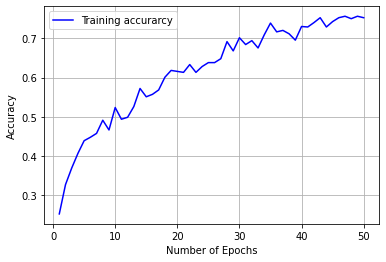

In [20]:
#get the details form the history object
acc = reshis.history['accuracy']
# val_acc = reshis.history['val_accuracy']
loss = reshis.history['loss']
# val_loss = reshis.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
# plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
# plt.title(' ResNet50 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.legend()

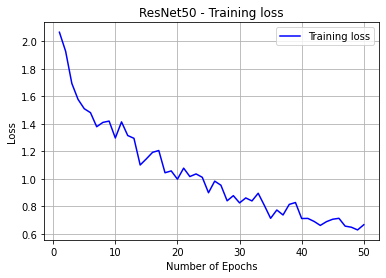

In [21]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('ResNet50 - Training loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/50_ep_Resnet50_Loss.png")

******Model Accuracy on Known Data

In [22]:
my_resnet_model.evaluate(train1)


804/804 [==============================] - 24s 29ms/step - loss: 1.1733 - accuracy: 0.5249


[1.1733191013336182, 0.5248756408691406]

In [23]:
my_resnet_model.evaluate_generator(train2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.1425929069519043, 0.5273631811141968]

In [ ]:
my_resnet_model.evaluate(test)